<a href="https://colab.research.google.com/github/Aqfa07/ML-Project/blob/main/Project%204%3A%20Training%20with%20GradientTape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 533.8663330078125
Epoch 20, Loss: 0.2930639386177063
Epoch 40, Loss: 0.28539445996284485
Epoch 60, Loss: 0.2791091799736023
Epoch 80, Loss: 0.27395838499069214
Epoch 100, Loss: 0.2697373330593109
Epoch 120, Loss: 0.2662780284881592
Epoch 140, Loss: 0.2634432911872864
Epoch 160, Loss: 0.2611200213432312
Epoch 180, Loss: 0.25921621918678284


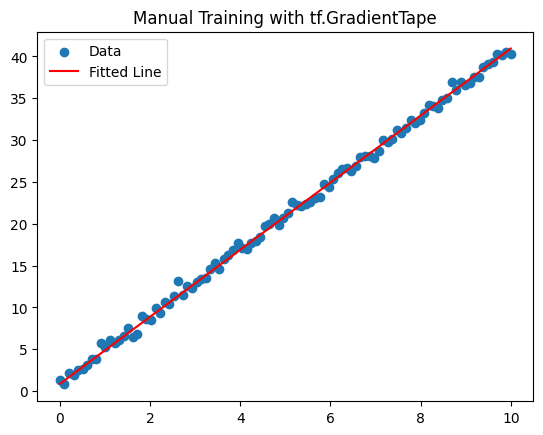

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.linspace(0, 10, 100).astype(np.float32)             # 100 input values from 0 to 10
y = 4 * X + 1 + np.random.randn(*X.shape).astype(np.float32) * 0.5  # Target: linear relation + noise

# Convert to tensors
X_tensor = tf.convert_to_tensor(X.reshape(-1, 1))           # Reshape to column vector
y_tensor = tf.convert_to_tensor(y.reshape(-1, 1))           # Reshape to column vector

# Initialize weight and bias variables
W = tf.Variable(tf.random.normal([1, 1], dtype=tf.float32)) # Weight initialized randomly
b = tf.Variable(tf.zeros([1], dtype=tf.float32))            # Bias initialized as zero

# Set learning rate and number of epochs
lr = 0.01
epochs = 200

# Training loop using GradientTape
for epoch in range(epochs):
    with tf.GradientTape() as tape:                         # Record operations for auto-diff
        y_pred = tf.matmul(X_tensor, W) + b                # Compute predictions: y = Wx + b
        loss = tf.reduce_mean(tf.square(y_pred - y_tensor)) # Mean Squared Error loss

    gradients = tape.gradient(loss, [W, b])                # Compute gradients w.r.t W and b
    W.assign_sub(lr * gradients[0])                        # Update weights
    b.assign_sub(lr * gradients[1])                        # Update bias

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy()}")

# Make predictions after training
y_pred = tf.matmul(X_tensor, W) + b                        # Final prediction line

# Plot results
plt.scatter(X, y, label='Data')                            # Plot original data
plt.plot(X, y_pred.numpy(), color='red', label='Fitted Line') # Plot regression line
plt.title("Manual Training with tf.GradientTape")
plt.legend()
plt.show()